## PCA (I): Ejemplo de uso y obtención

### Carga de datos

Como siempre empezamos importando y cargando las librerías necesarias.

In [3]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Para aprender a usar la PCA de sklearn vamos a utilizar un dataset sobre criminalidad en USA, que vamos a cargar de la libería `statsmodels`

In [4]:
# Dataset
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

Como siempre hacemos nuestra primera revisión

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
datos.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [8]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Fijate en que no fijamos un target, porque ahora no estamos buscando resolver un problema concreto, estamos buscando encontrar posibles features que contengan la misma información (en términos matemáticos) que el dataset original. Es por eso un aprendizaje no supervisado (vamos a "Aprender" las componentes principales del dataset)

### Proceso de PCA

La obtención de la PCA siguentes pasos:  
1. Escalado de las variables  
2. Instanciación PCA   
3. "Entrenamiento"  
4. Mostrar valores PCA [No siempre es necesario] en función de las features iniciales
5. Análisis de la varianza Explicada: Selección del número de componentes necesarias [Depende de la aplicación]  
6. Generación del dataset "PCAdo"


### Escalado PCA

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales

Vemos primero si necesita una ayudita con transformación.

array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

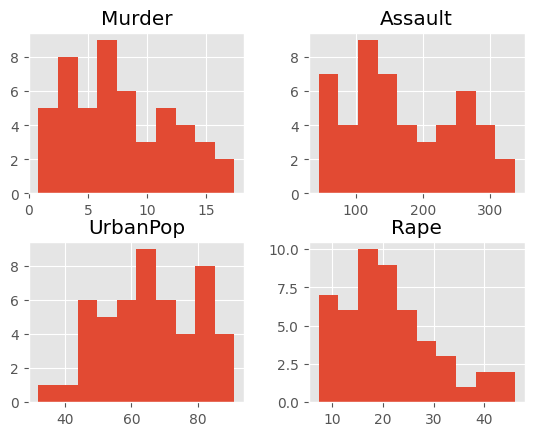

In [9]:
datos.hist()

In [10]:
datos_sin = datos.copy()

In [11]:
scaler = StandardScaler()

datos[datos.columns.to_list()] = scaler.fit_transform(datos)

### Instanciación y entrenamiento

In [12]:
from sklearn.decomposition import PCA # Aquí es donde puedes encontrar la PCA

modelo_pca = PCA()
modelo_pca.fit(datos)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

### Generamos la PCA y la ponemos en relación con las otras features

Para ver los coeficientes o parámetros aprendidos por el modelo PCA (los coeficientes de la componente principales) usaremos el atributo `components_` del modelo

In [13]:
modelo_pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

Pero veámoslo de una forma más entendible asociando cada coeficiente a su feature original:

In [14]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_, # En components están los autovectores es decir los coeficientes de la PCA
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4'] # En ingles pasamos de CP a PC :-) (Principal component)
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,-0.418181,-0.187986,0.872806,0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,-0.649228,0.743407,-0.133878,-0.089024


Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

$PC1=0.535899*Murder+0.583184*Assault+0.278191*UrbanPop+0.543432*Rape$

Es decir, si quiero calcular la primera componente iré sustituyendo los valores de Murder, Assault, UrbanPop y Rape de cada instancia en la ecuación anterior y así lo obtendré.

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

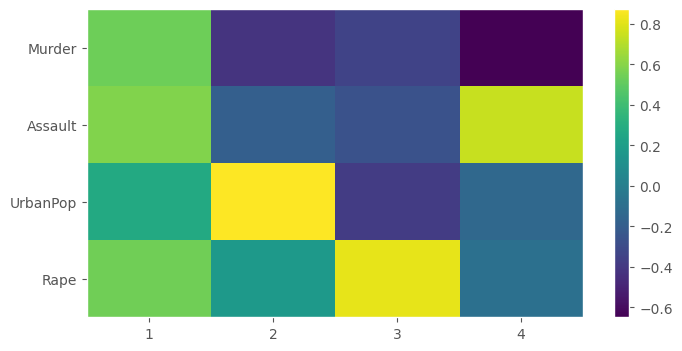

In [15]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

***

### Análisis de la varianza explicada

Como parte de la selección del número de componentes (nuevas features) que queremos quedarnos, es interesante ver el porcentaje de varianza (de capacidad informativa) de las nuevas features (de las componentes).

Para eso hacemos uso del atributo `explained_variance_ratio_` del modelo: 

In [16]:
modelo_pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Ese es el porcentaje explicado por cada componente, y su suma debe ser igual a 1:


In [17]:
sum(modelo_pca.explained_variance_ratio_)

np.float64(1.0)

Emplear la primera componente nos otorga un 62% de potencia, usar las dos primeras un 86%, etc, etc (y de esta forma escogeremos).  


NOTA: Importante, estamos explicando o "recogiendo" varianza de los datos de partida aunque no necesariamente todas las relaciones y potencia informativa, lo empleamos de esa forma para que se entienda mejor, veremos en el ejemplo práctico de aplicación a modelo que este porcentaje no quiere decir que, por ejemplo, un modelo entrenado sólo con la primera componente principal como feature, PC1, tenga un 62% del éxito del modelo con todas las features originales. Es sólo orientativo.

Como en el caso de las componentes y coeficientes, veamos este ratio gráficamente:

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


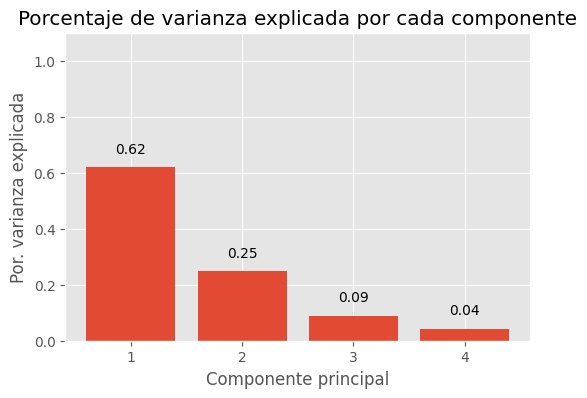

In [18]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Un gráfico que usaremos bastante para escoger el número de componentes a quedarnos es el de varianza explicada acumulada. 

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


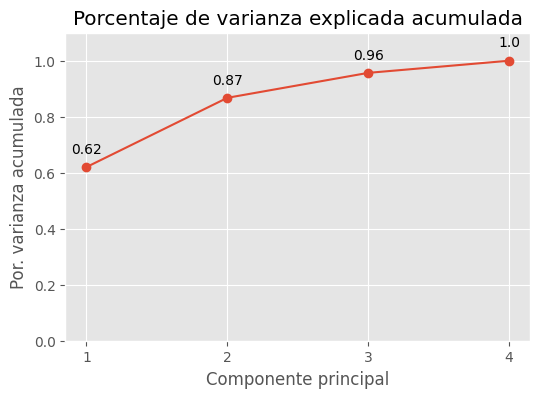

In [19]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada. En la siguiente sesión veremos que según el tanto por ciento que queramos conservar así escogeremos el número de componentes.

### Obtención del dataset con las "nuevas features"

Una vez entrenado el modelo, con el método `transform()` del modelo se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes. NOTA: Fijate que **NO es un método `predict`**, porque no se predice, sino que es la aplicación de una formulación exacta.

In [20]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = modelo_pca.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


Podemos comprobar como la transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma "manual", multiplicando los vectores de coeficientes con los vectores de las features:

In [21]:
modelo_pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

In [22]:
proyecciones = np.dot(modelo_pca.components_, datos.T) # components_ es una matriz de num_features x num_features por eso si queremos multiplicarla por todos los valores tenemos que transponer los datos de T para poder hacer la matriz multiplicación (numero de columnas de A = num de filas B, recuerdo de nuestros días de álgebra)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4']) 
proyecciones = proyecciones.transpose().set_index(datos.index) # Y luego transponer 
proyecciones.head()

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


Y puedes comprobar que da el mismo resultado. Además es posible dados los datos transformados volver a los valores originales de las features (pero necesitas todas las componentes), para ello usaremos el método  `inverse_transform()` del modelo:

In [23]:
# Recostruccion de las proyecciones
# ==============================================================================
reconstruccion = modelo_pca.inverse_transform(X=proyecciones) # Así obtenemos el dataset de entrada que estaba escalado
datos_back = datos.copy()
datos_back[datos_sin.columns.to_list()] = scaler.inverse_transform(reconstruccion)
print('------------------')
print('Valores originales')
print('------------------')
display(datos_sin.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(datos_back.head())

------------------
Valores originales
------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


---------------------
Valores reconstruidos
---------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6
